# Tema 3: Entrega práctica - Estudio final preprocesado

### Autor: Juan José Méndez Torrero

### Asignatura: Procesamiento y Visualización de Datos

# Fuente de datos

El conjunto de datos para esta práctica contiene información sobre en el número de áreas quemadas en el bosque de Portugual. Este conjunto de datos se pueden encontrar en la base de datos de al [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Forest+Fires). Se ha elegido este dataset ya que cuenta con un número suficiente de instancias (517) y características (12). Estas características son:

- X - coordenada espacial del eje x dentro del mapa del parque de Montesinho: 1 a 9 
- Y - coordenada espacial del eje Y dentro del mapa del parque de Montesinho: 2 a 9 
- moth - mes del año: 'ene' a 'dic' 
- day - día de la semana: 'mon' a 'sun' 
- FFMC - índice FFMC del sistema FWI: de 18,7 a 96,20 
- DMC - Índice DMC del sistema FWI: 1,1 a 291,3 
- DC - Índice DC del sistema FWI: 7,9 a 860,6 
- ISI - Índice ISI del sistema FWI: 0,0 a 56,10 
- temp - temperatura en grados Celsius: de 2,2 a 33,30 
- RH - humedad relativa en %: 15,0 a 100 
- wind - velocidad del viento en km/h: 0,40 a 9,40 
- rain - lluvia exterior en mm/m2 : 0,0 a 6,4 

Además, este conjunto de datos cuenta con un variable a predecir denominada __area__ y almacena la superficie quemada del bosque (en ha): 0.00 a 1090.84 

Este conjunto de datos nos permitirá aplicar las distintas técnicas de preprocesado vistas a lo largo del curso, ya que cuenta tanto con variables de tipo numérico, como de tipo categórico. Además, este conjunto de datos no está preprocesado de antemano.

# Código de extracción de datos

In [1]:
import pandas as pd

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv', sep=",")
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


# Análisis preliminar

Una vez hemos realizado los cambios sobre las características, separaremos las columnas numéricas y las columnas catégoricas para su posterior uso en el análisis del conjunto de datos.

In [2]:
def get_columns_types(data):
    numeric_columns = []
    nominal_columns = []

    for col in data.columns.values:
        
        if pd.api.types.is_numeric_dtype(data[col]):
            numeric_columns.append(col)

        else:
            nominal_columns.append(col)

    print("Las columnas numéricas son: {0}".format(str(numeric_columns)))
    print("Las columnas nominales son: {0}".format(str(nominal_columns)))

    return numeric_columns, nominal_columns

numeric_columns, nominal_columns = get_columns_types(data)

Las columnas numéricas son: ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
Las columnas nominales son: ['month', 'day']


Se puede observar que las características _X_ e _Y_ han sido consideradas como numéricas, cuando en realidad, en este dataset han de tomar valores categórcios, con lo que realizamos la conversión a categórico

In [3]:
import numpy as np

type_x = pd.CategoricalDtype(categories=np.unique(data["X"]), ordered=False)
type_y = pd.CategoricalDtype(categories=np.unique(data["Y"]), ordered=False)

data["X"] = data["X"].astype(type_x)
data["Y"] = data["Y"].astype(type_y)

numeric_columns, nominal_columns = get_columns_types(data)

Las columnas numéricas son: ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
Las columnas nominales son: ['X', 'Y', 'month', 'day']


In [4]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


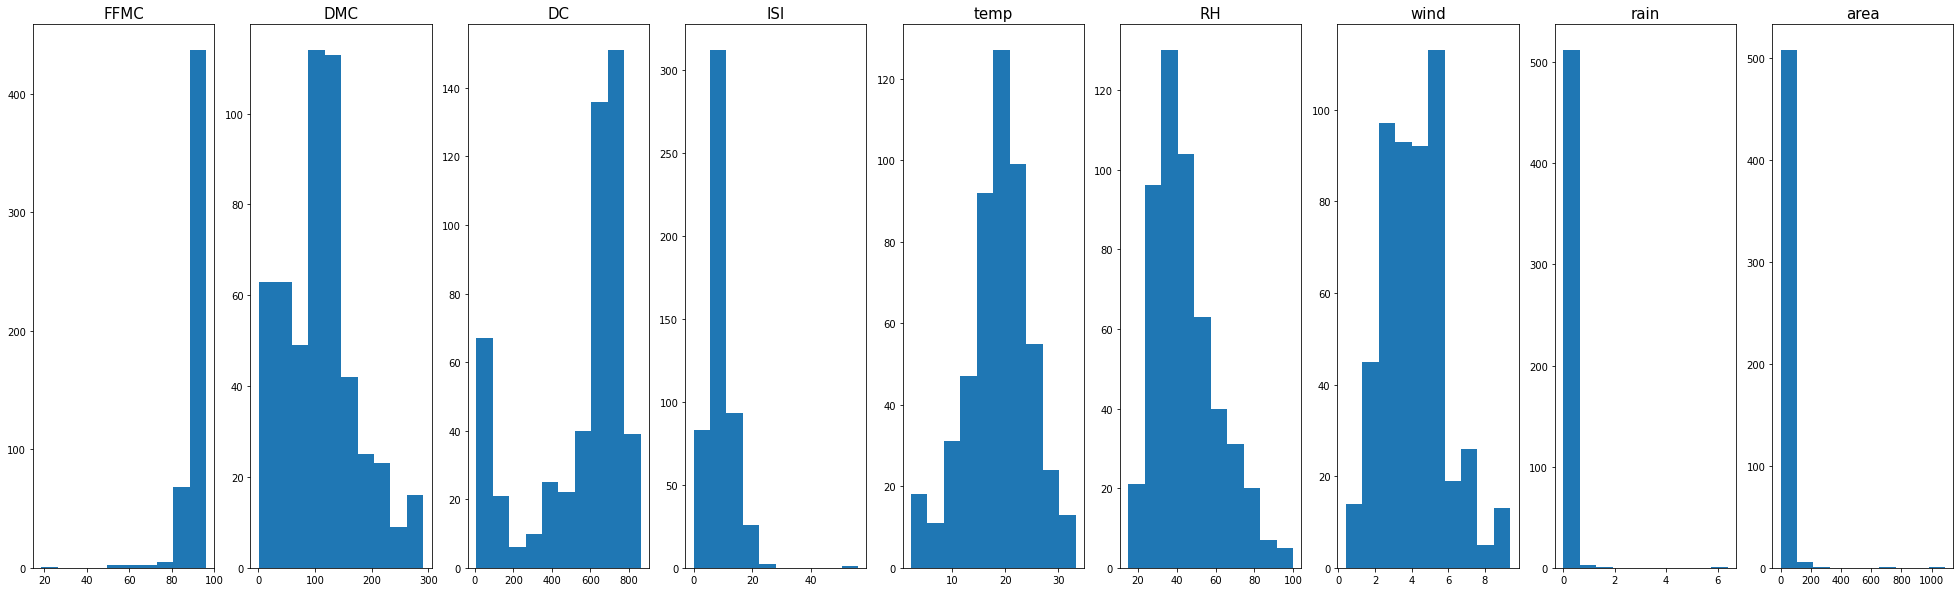

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (50,10))

i=1

for col in numeric_columns:
    ax = fig.add_subplot(1,len(data.columns), i)
    ax.set_title(col, fontsize = 15)
    ax.hist(data[col], bins=10)

    i += 1



<AxesSubplot:>

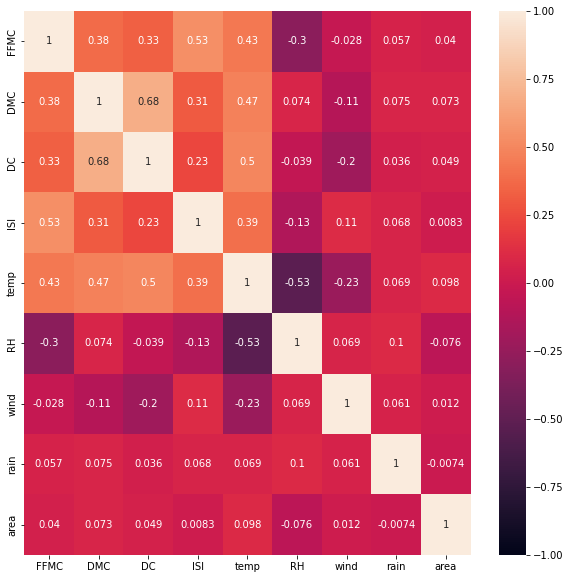

In [6]:
import seaborn as sns # pip install seaborn

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, ax=ax)

# Transformación de los datos

Ahora, vamos a sustituir los valores anómalos por __na__ usando el método _z-score_.

In [7]:
umbral_z_score = 4.0

data_with_outliers = data.copy()

desc = data.describe()
for i, fila in data.iterrows():
    for caract in desc:
        z_score = abs(data.loc[i][caract] - desc.loc['mean'][caract]) / desc.loc['std'][caract]
        if z_score > umbral_z_score:
            data_with_outliers.loc[i,caract] = np.nan

data_with_outliers.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,511.000000,517.000000,517.000000,516.000000,517.000000,517.000000,517.000000,515.000000,514.000000
mean,91.087280,110.872340,547.940039,8.930426,18.889168,44.288201,4.017602,0.006602,8.806226
std,3.272879,64.046482,248.066192,4.064139,5.806625,16.317469,1.791653,0.069707,24.657173
min,69.000000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.300000,68.600000,437.700000,6.475000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.495000
75%,92.900000,142.400000,713.900000,10.725000,22.800000,53.000000,4.900000,0.000000,6.437500
max,96.200000,291.300000,860.600000,22.700000,33.300000,100.000000,9.400000,1.000000,212.880000


Una vez se han sustituido los valores anómalos, los sustituimos por el valor medio de esa columna.

In [8]:
data = data.fillna(data.mean())
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


# Arreglar!!!!!
A continuación, se realizará el proceso de _one hot encoding_ para poder usar los valores de las columnas _month_ y _day_

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data["month"] = encoder.fit_transform(data["month"])

data["day"] = encoder.fit_transform(data["day"])

data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Ahora es turno de las variables numéricas. Como hemos podido observar en las distribuciones de las caracterísitcas, sólo las variables _temp_ y _RH_ parecen tener una distribución normal, aunque el rango de estas caracterísitcas es muy grande, con lo que lo siguiente que se va a hacer es estandarizar estas características entre [0 y 1], es decir, vamos a normalizar las variables.

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

data[numeric_columns] = pd.DataFrame(scaler.fit_transform(data[numeric_columns]), columns=numeric_columns)

In [11]:
data.describe()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,5.758221,2.736944,0.928318,0.378264,0.633329,0.160814,0.536629,0.344567,0.401956,0.003385,0.011777
std,4.373275,1.925061,0.071227,0.220698,0.290918,0.081274,0.186708,0.191970,0.199073,0.046244,0.058355
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.922581,0.232598,0.504046,0.115865,0.427653,0.211765,0.255556,0.000000,0.000000
50%,6.000000,3.000000,0.940645,0.369400,0.769673,0.149733,0.549839,0.317647,0.400000,0.000000,0.000477
75%,11.000000,4.000000,0.957419,0.486906,0.827958,0.192513,0.662379,0.447059,0.500000,0.000000,0.006023
max,11.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
